# Análisis EDA de productores autorizados 2023

# 1. Importación de librerías y carga de datos

In [24]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)

In [25]:
lista_productores = pd.read_csv('../../data/listado_productores_complete.csv')

In [26]:
lista_productores.shape

(1541130, 12)

# 2. Análisis Inicial

## 2.1 Estructura de los datos

In [27]:
lista_productores.head()

,ESTADO_prod,MUNICIPIO_prod,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE,ESTADO_inegi,MUNICIPIO_inegi,CVE_MUN_Unique,CVE_ENT,CVE_MUN
0,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000510-S000-AS,AGUILAR,AGUILAR,NICOLAS,2,AGUASCALIENTES,AGUASCALIENTES,1-1,1.0,1.0
1,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000339-S000-AS,AGUILAR,GARCIA,MANUEL,2,AGUASCALIENTES,AGUASCALIENTES,1-1,1.0,1.0
2,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000340-S000-AS,AGUILAR,GARCIA,PAULO,2,AGUASCALIENTES,AGUASCALIENTES,1-1,1.0,1.0
3,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000511-S000-AS,AGUILAR,OROPEZA,MIGUEL,2,AGUASCALIENTES,AGUASCALIENTES,1-1,1.0,1.0
4,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000676-S000-AS,ALBA,ESTRADA,MARIA DEL ROSARIO,2,AGUASCALIENTES,AGUASCALIENTES,1-1,1.0,1.0


In [28]:
lista_productores.tail()

,ESTADO_prod,MUNICIPIO_prod,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE,ESTADO_inegi,MUNICIPIO_inegi,CVE_MUN_Unique,CVE_ENT,CVE_MUN
1541125,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103370-S000-PL,NaN,NaN,NaN,2,PUEBLA,ZOQUITLAN,21-217,21.0,217.0
1541126,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103371-S000-PL,NaN,NaN,NaN,2,PUEBLA,ZOQUITLAN,21-217,21.0,217.0
1541127,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103166-S000-PL,NaN,NaN,NaN,2,PUEBLA,ZOQUITLAN,21-217,21.0,217.0
1541128,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103373-S000-PL,NaN,NaN,NaN,2,PUEBLA,ZOQUITLAN,21-217,21.0,217.0
1541129,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103374-S000-PL,NaN,NaN,NaN,2,PUEBLA,ZOQUITLAN,21-217,21.0,217.0


## 2.2 Información general

In [29]:
lista_productores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541130 entries, 0 to 1541129
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ESTADO_prod       1541130 non-null  object 
 1   MUNICIPIO_prod    1465618 non-null  object 
 2   ACUSE             1541130 non-null  object 
 3   APELLIDO PATERNO  1536836 non-null  object 
 4   APELLIDO MATERNO  1512563 non-null  object 
 5   NOMBRE (S)        1536837 non-null  object 
 6   PAQUETE           1541130 non-null  int64  
 7   ESTADO_inegi      1455397 non-null  object 
 8   MUNICIPIO_inegi   1455397 non-null  object 
 9   CVE_MUN_Unique    1455397 non-null  object 
 10  CVE_ENT           1455397 non-null  float64
 11  CVE_MUN           1455397 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 141.1+ MB


In [30]:
lista_productores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541130 entries, 0 to 1541129
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ESTADO_prod       1541130 non-null  object 
 1   MUNICIPIO_prod    1465618 non-null  object 
 2   ACUSE             1541130 non-null  object 
 3   APELLIDO PATERNO  1536836 non-null  object 
 4   APELLIDO MATERNO  1512563 non-null  object 
 5   NOMBRE (S)        1536837 non-null  object 
 6   PAQUETE           1541130 non-null  int64  
 7   ESTADO_inegi      1455397 non-null  object 
 8   MUNICIPIO_inegi   1455397 non-null  object 
 9   CVE_MUN_Unique    1455397 non-null  object 
 10  CVE_ENT           1455397 non-null  float64
 11  CVE_MUN           1455397 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 141.1+ MB


## 2.3 Estadísticas Descriptivas

In [31]:
# Obtener estadísticas descriptivas para todas las variables
descriptive_stats = lista_productores.describe(include='all').transpose()

# Mostrar las estadísticas descriptivas
print(descriptive_stats)

                      count   unique                             top    freq  \
ESTADO_prod         1541130       20                        GUERRERO  356223   
MUNICIPIO_prod      1465618     1694                  LAS MARGARITAS   19497   
ACUSE               1541130  1525720  23-PRONAFE-FERT-006339-S000-CC       3   
APELLIDO PATERNO    1536836    13551                       HERNANDEZ   75851   
APELLIDO MATERNO    1512563    15970                       HERNANDEZ   75802   
NOMBRE (S)          1536837   116715                            JUAN   24798   
PAQUETE           1541130.0      NaN                             NaN     NaN   
ESTADO_inegi        1455397       19                        GUERRERO  354841   
MUNICIPIO_inegi     1455397     1679                  LAS MARGARITAS   19497   
CVE_MUN_Unique      1455397     1729                            7-52   19497   
CVE_ENT           1455397.0      NaN                             NaN     NaN   
CVE_MUN           1455397.0      NaN    

# 3. Limpieza de Datos

## 3.1 Valores Nulos

In [32]:
valores_nulos = lista_productores.isna().sum()
print(valores_nulos)

ESTADO_prod             0
MUNICIPIO_prod      75512
ACUSE                   0
APELLIDO PATERNO     4294
APELLIDO MATERNO    28567
NOMBRE (S)           4293
PAQUETE                 0
ESTADO_inegi        85733
MUNICIPIO_inegi     85733
CVE_MUN_Unique      85733
CVE_ENT             85733
CVE_MUN             85733
dtype: int64


## 3.2 Decisiones sobre valores nulos

## 3.3 Valores Duplicados

In [33]:
valores_duplicados = lista_productores.duplicated().sum()
print(f'Hay {valores_duplicados} valores duplicados')

Hay 0 valores duplicados


## 3.4 Decisiones sobre valores duplicados

## 3.5 Corrección de Tipos de Datos

In [34]:
lista_productores = lista_productores.astype({
    'ESTADO_prod': 'str',
    'MUNICIPIO_prod': 'str',
    'ACUSE': 'str',
    'APELLIDO PATERNO': 'str',
    'APELLIDO MATERNO': 'str',
    'NOMBRE (S)': 'str',
    'PAQUETE': 'int',
    'ESTADO_inegi': 'str',
    'MUNICIPIO_inegi': 'str',
    'CVE_MUN_Unique': 'str',
    'CVE_MUN': 'str',
    'CVE_ENT': 'str'
})

In [35]:
lista_productores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541130 entries, 0 to 1541129
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   ESTADO_prod       1541130 non-null  object
 1   MUNICIPIO_prod    1541130 non-null  object
 2   ACUSE             1541130 non-null  object
 3   APELLIDO PATERNO  1541130 non-null  object
 4   APELLIDO MATERNO  1541130 non-null  object
 5   NOMBRE (S)        1541130 non-null  object
 6   PAQUETE           1541130 non-null  int32 
 7   ESTADO_inegi      1541130 non-null  object
 8   MUNICIPIO_inegi   1541130 non-null  object
 9   CVE_MUN_Unique    1541130 non-null  object
 10  CVE_ENT           1541130 non-null  object
 11  CVE_MUN           1541130 non-null  object
dtypes: int32(1), object(11)
memory usage: 135.2+ MB


# 4. Análisis Univariado

## 4.1 Variables Numéricas

En este caso, la única variable númerica es la de paquetes.

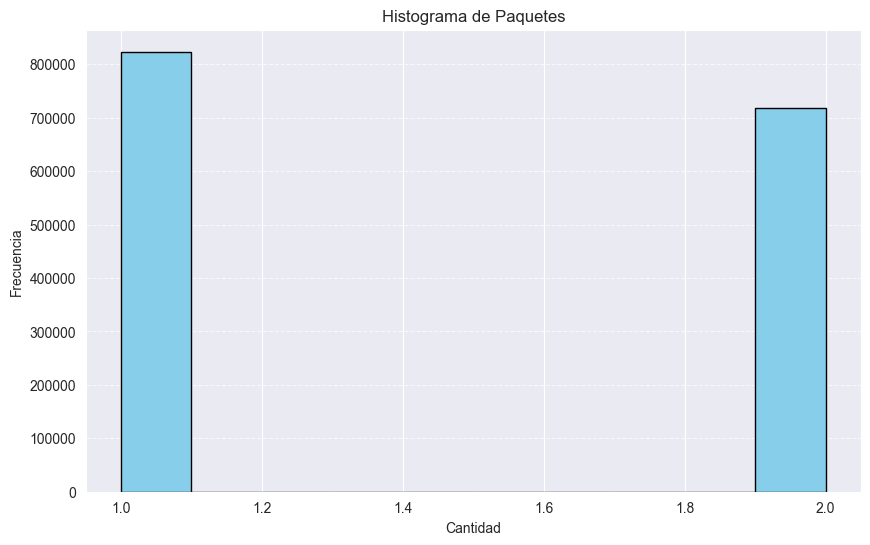

In [23]:
# Filtrar los datos para estar dentro del rango de interés
paquetes = lista_productores['PAQUETE']

# Crear el histograma con un mayor número de bins
plt.figure(figsize=(10, 6))
plt.hist(paquetes, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Paquetes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4.2 Variables Categóricas